In [1]:
import sympy as sp
from sympy import (
    symbols, Eq, solve, groebner,
    sin, cos, cancel, numer, init_printing
)
from sympy.plotting import (
    plot3d_parametric_line,
    plot3d_parametric_surface
)

import math

init_printing()


# Задание 2-1
### Решите следующие системы. В каждом из случаев продемонстрируйте применение критериев совместности, конечности числа решений, найдите размерность множества решений.

In [2]:
# Объявляем переменные
a, b, c = sp.symbols("x y z", real=True)

# Исходный набор полиномов
polys = [
    a**2 - 1,
    (a - 1) * b,
    (a + 1) * c
]

# Строим базис Гребнера в лексикографическом порядке
G = sp.groebner(polys, a, b, c, order="lex")

# Базис Гребнера
print("Groebner basis:")
for g in G:
    print(g)

# Проверяем размерность идеала:
# если идеал нулевой размерности, то решений конечно много
dim_zero = sp.is_zero_dimensional(polys)
print("Zero-dimensional:", dim_zero)

# Так как размерность не нулевая, решений бесконечно много
# Находим параметрическое решение
sol = sp.solve(G, [a, b, c], dict=True)

print("Solutions:")
for item in sol:
    print(item)


Groebner basis:
x**2 - 1
x*y - y
x*z + z
y*z
Zero-dimensional: False
Solutions:
{x: -1, y: 0}
{x: 1, z: 0}
{x: 1, y: 0, z: 0}


# Задание 2-2
### Для поверхности, заданной в параметрической форме: 
### a) Найти её рациональную параметризацию. 
### b) Получить её уравнение в неявном виде, т. е. в виде функции от переменных x, y, z. 
### c) Найти и исследовать её множество особых точек. 
### d) Проверьте, позволяет ли указанная параметризация поверхности полностью описать особые точки соответствующего афинного многообразия

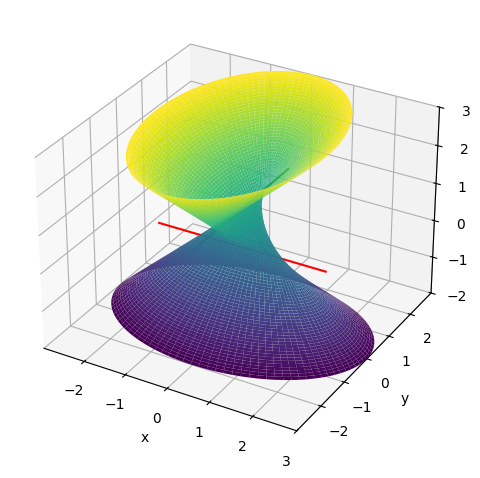

In [3]:
# Переменные пространства и параметров
x, y, z = symbols("x y z", real=True)
u, v = symbols("u v", real=True)

# Параметрическое описание поверхности
# x = (1-u)*cos(v), y = u*sin(v), z = u
surf_equations = [
    Eq(x, (1 - u) * cos(v)),
    Eq(y, u * sin(v)),
    Eq(z, u)
]

# a) Получение рациональной параметризации
# Ввод вспомогательного параметра
t = symbols("t", real=True)

# Стандартные формулы, позволяющие заменить тригонометрию рациональными функциями
trig_to_rat = {
    cos(v): (t**2 - 1)/(t**2 + 1),
    sin(v): 2*t/(t**2 + 1)
}

# Применение замен к правым частям уравнений
rat_rhs = [eq.rhs.subs(trig_to_rat) for eq in surf_equations]
rat_rhs
# Полученные выражения рациональны относительно u и t, что и требовалось

# b) Неявное описание поверхности
# Перепишем систему как многочлены вида (левая часть - правая часть) и устраним знаменатели
exprs = []
for var, rhs in zip([x, y, z], rat_rhs):
    poly = numer(cancel(var - rhs))
    exprs.append(poly)

exprs

# Построим базис для исключения параметров
G = groebner(exprs, u, t, x, y, z, order="grlex")

# Первый элемент базиса является неявным уравнением поверхности
implicit_equation = G[0]
implicit_equation

# c) Особые точки поверхности
# Для поиска особых точек берутся уравнение и его частные производные
system_SP = [implicit_equation] + [implicit_equation.diff(w) for w in (x, y, z)]
system_SP

# Поиск базиса для идеала особых точек
G_SP = groebner(system_SP, x, y, z)

# Финальный элемент базиса не зависит от всех переменных
crit_poly = G_SP[-1].factor()
crit_poly

# Решения по z
critical_z = solve(crit_poly, z, dict=True)
critical_z

# z = 0
sub_zero = [system_SP[i].subs(critical_z[0]) for i in range(4)]
sub_zero

# Решение по y
sol_zero = solve(sub_zero, y, dict=True)
sol_zero

# z = 1
sub_one = [system_SP[i].subs(critical_z[1]) for i in range(4)]
sub_one

# Решение по x
sol_one = solve(sub_one, x, dict=True)
sol_one

# Построение двух семейств точек как параметрических кривых
curve_data1 = {var: expr for var, expr in zip([y, z], sp.solve_poly_system(G_SP, [y, z])[0])}
curve_data1.update({x: x})

curve_data2 = {var: expr for var, expr in zip([x, z], sp.solve_poly_system(G_SP, [x, z])[0])}
curve_data2.update({y: y})

curve_data1, curve_data2

# Проекции на координаты (для дальнейшего использования, если надо)
line1 = [curve_data1[v] for v in [x, y, z]]
line2 = [curve_data2[v] for v in [x, y, z]]

p1 = plot3d_parametric_line(
    *line1,
    (x, -2, 2),
    line_color="red",
    show=False
)

p2 = plot3d_parametric_line(
    *line2,
    (y, -2, 2),
    line_color="green",
    show=False
)
Surf = [(1 - u) * sp.cos(v), u * sp.sin(v), u]

p3 = plot3d_parametric_surface(
    *Surf,
    (u, -2, 3),
    (v, 0, 2*math.pi),
    wireframe=True,
    show=False
)

# Демонстрация графиков совместно
for s in p2:
    p1.append(s)
for s in p3:
    p1.append(s)

p1.show()

# d) Анализ полноты параметризации
# Из визуализации и анализа следует, что параметр u и угол v
# не дают всех особых точек — прямые полностью попадают лишь в неявное описание.
